# EEP exploratory analysis
Trends and descriptive statistics by SEZ status.


In [2]:
import sys
from pathlib import Path

ROOT = (Path(__file__).resolve().parents[1]
        if "__file__" in globals() else Path.cwd().parent)

if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [3]:
import pandas as pd
import geopandas as gpd
from IPython.display import display
from src.data_wrangling import build_processed_dataset

gdf = build_processed_dataset()
display(gdf.head())
display(gdf[['EVI', 'NDVI']].describe())
display(gdf['sez_category'].value_counts())


c:\Users\amahai00\AIRS\eep\src\data_wrangling.py:36: UserWarning: Geometry column does not contain geometry.
  out_df["geometry"] = out_df.geometry.to_wkt()


geometry       EVI  Elevation_m  \
0  POLYGON ((44.39623 7.0878, 44.47501 7.08231, 4...  0.205019   997.403990   
1  POLYGON ((38.94484 10.50579, 39.02828 10.49908...  0.203666  2213.369893   
2  POLYGON ((40.82643 11.00522, 40.90873 10.99769...  0.120928   484.427545   
3  POLYGON ((37.18933 11.82087, 37.27427 11.81386... -0.038385  1787.037978   
4  POLYGON ((35.90539 6.24388, 35.98978 6.24036, ...  0.425907   493.152683   

   Grid_ID  Id      NDVI  Rainfall_mm   Shape_Area  Shape_Leng  Temperature_C  \
0        1   0  0.351937   581.699423  100000000.0     40000.0      23.848799   
1        2   0  0.349919   980.865694  100000000.0     40000.0      18.083886   
2        3   0  0.185530   392.650041  100000000.0     40000.0      29.613667   
3        4   0 -0.030195  1275.301757  100000000.0     40000.0      20.662173   
4        5   0  0.672080  1526.872446  100000000.0     40000.0      28.496355   

   ...  index_right  industrial_park_name  year_oper  SEZ  earliest_oper_year  \
0  ...          NaN                   NaN        NaN    0              2014.0   
1  ...          NaN                   NaN        NaN    0              2014.0   
2  ...          NaN                   NaN        NaN    0              2014.0   
3  ...          NaN                   NaN        NaN    0              2014.0   
4  ...          NaN                   NaN        NaN    0              2014.0   

   treat  adjacent  post_baseline  post_by_grid  sez_category  
0  False     False          False         False       non_sez  
1  False     False          False         False       non_sez  
2  False     False          False         False       non_sez  
3  False     False          False         False       non_sez  
4  False     False          False         False       non_sez  

[5 rows x 24 columns]

EVI          NDVI
count  39015.000000  39015.000000
mean       0.230999      0.384689
std        0.104958      0.167665
min       -0.117760     -0.180625
25%        0.151725      0.248245
50%        0.217257      0.381472
75%        0.304530      0.511541
max        0.557142      0.831732

sez_category
non_sez     38213
adjacent      778
sez            28
Name: count, dtype: int64

In [4]:
covariates = ['Elevation_m', 'Rainfall_mm', 'Temperature_C', 'NighttimeLight_nW']
display(gdf[covariates].describe())
trend_summary = gdf.groupby(['year', 'sez_category'])[['EVI', 'NDVI']].mean().reset_index()
trend_summary.head()


Elevation_m   Rainfall_mm  Temperature_C  NighttimeLight_nW
count  39015.000000  38895.000000   39015.000000       24976.000000
mean    1234.373859    801.839979      23.323899           0.054490
std      698.321565    485.100664       4.552547           0.269574
min     -121.514966     87.441481       7.447917          -0.061701
25%      660.067929    391.835279      20.103718          -0.004335
50%     1121.938377    691.006984      23.765747           0.027739
75%     1717.153468   1121.308779      26.958766           0.064785
max     4115.069451   2475.792536      34.902884          14.413564

C:\Users\amahai00\AppData\Local\Temp\ipykernel_3372\3221050941.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_summary = gdf.groupby(['year', 'sez_category'])[['EVI', 'NDVI']].mean().reset_index()


year sez_category       EVI      NDVI
0  2013     adjacent  0.248560  0.412651
1  2013      non_sez  0.232732  0.386736
2  2013          sez       NaN       NaN
3  2014     adjacent  0.261174  0.427983
4  2014      non_sez  0.229960  0.384581

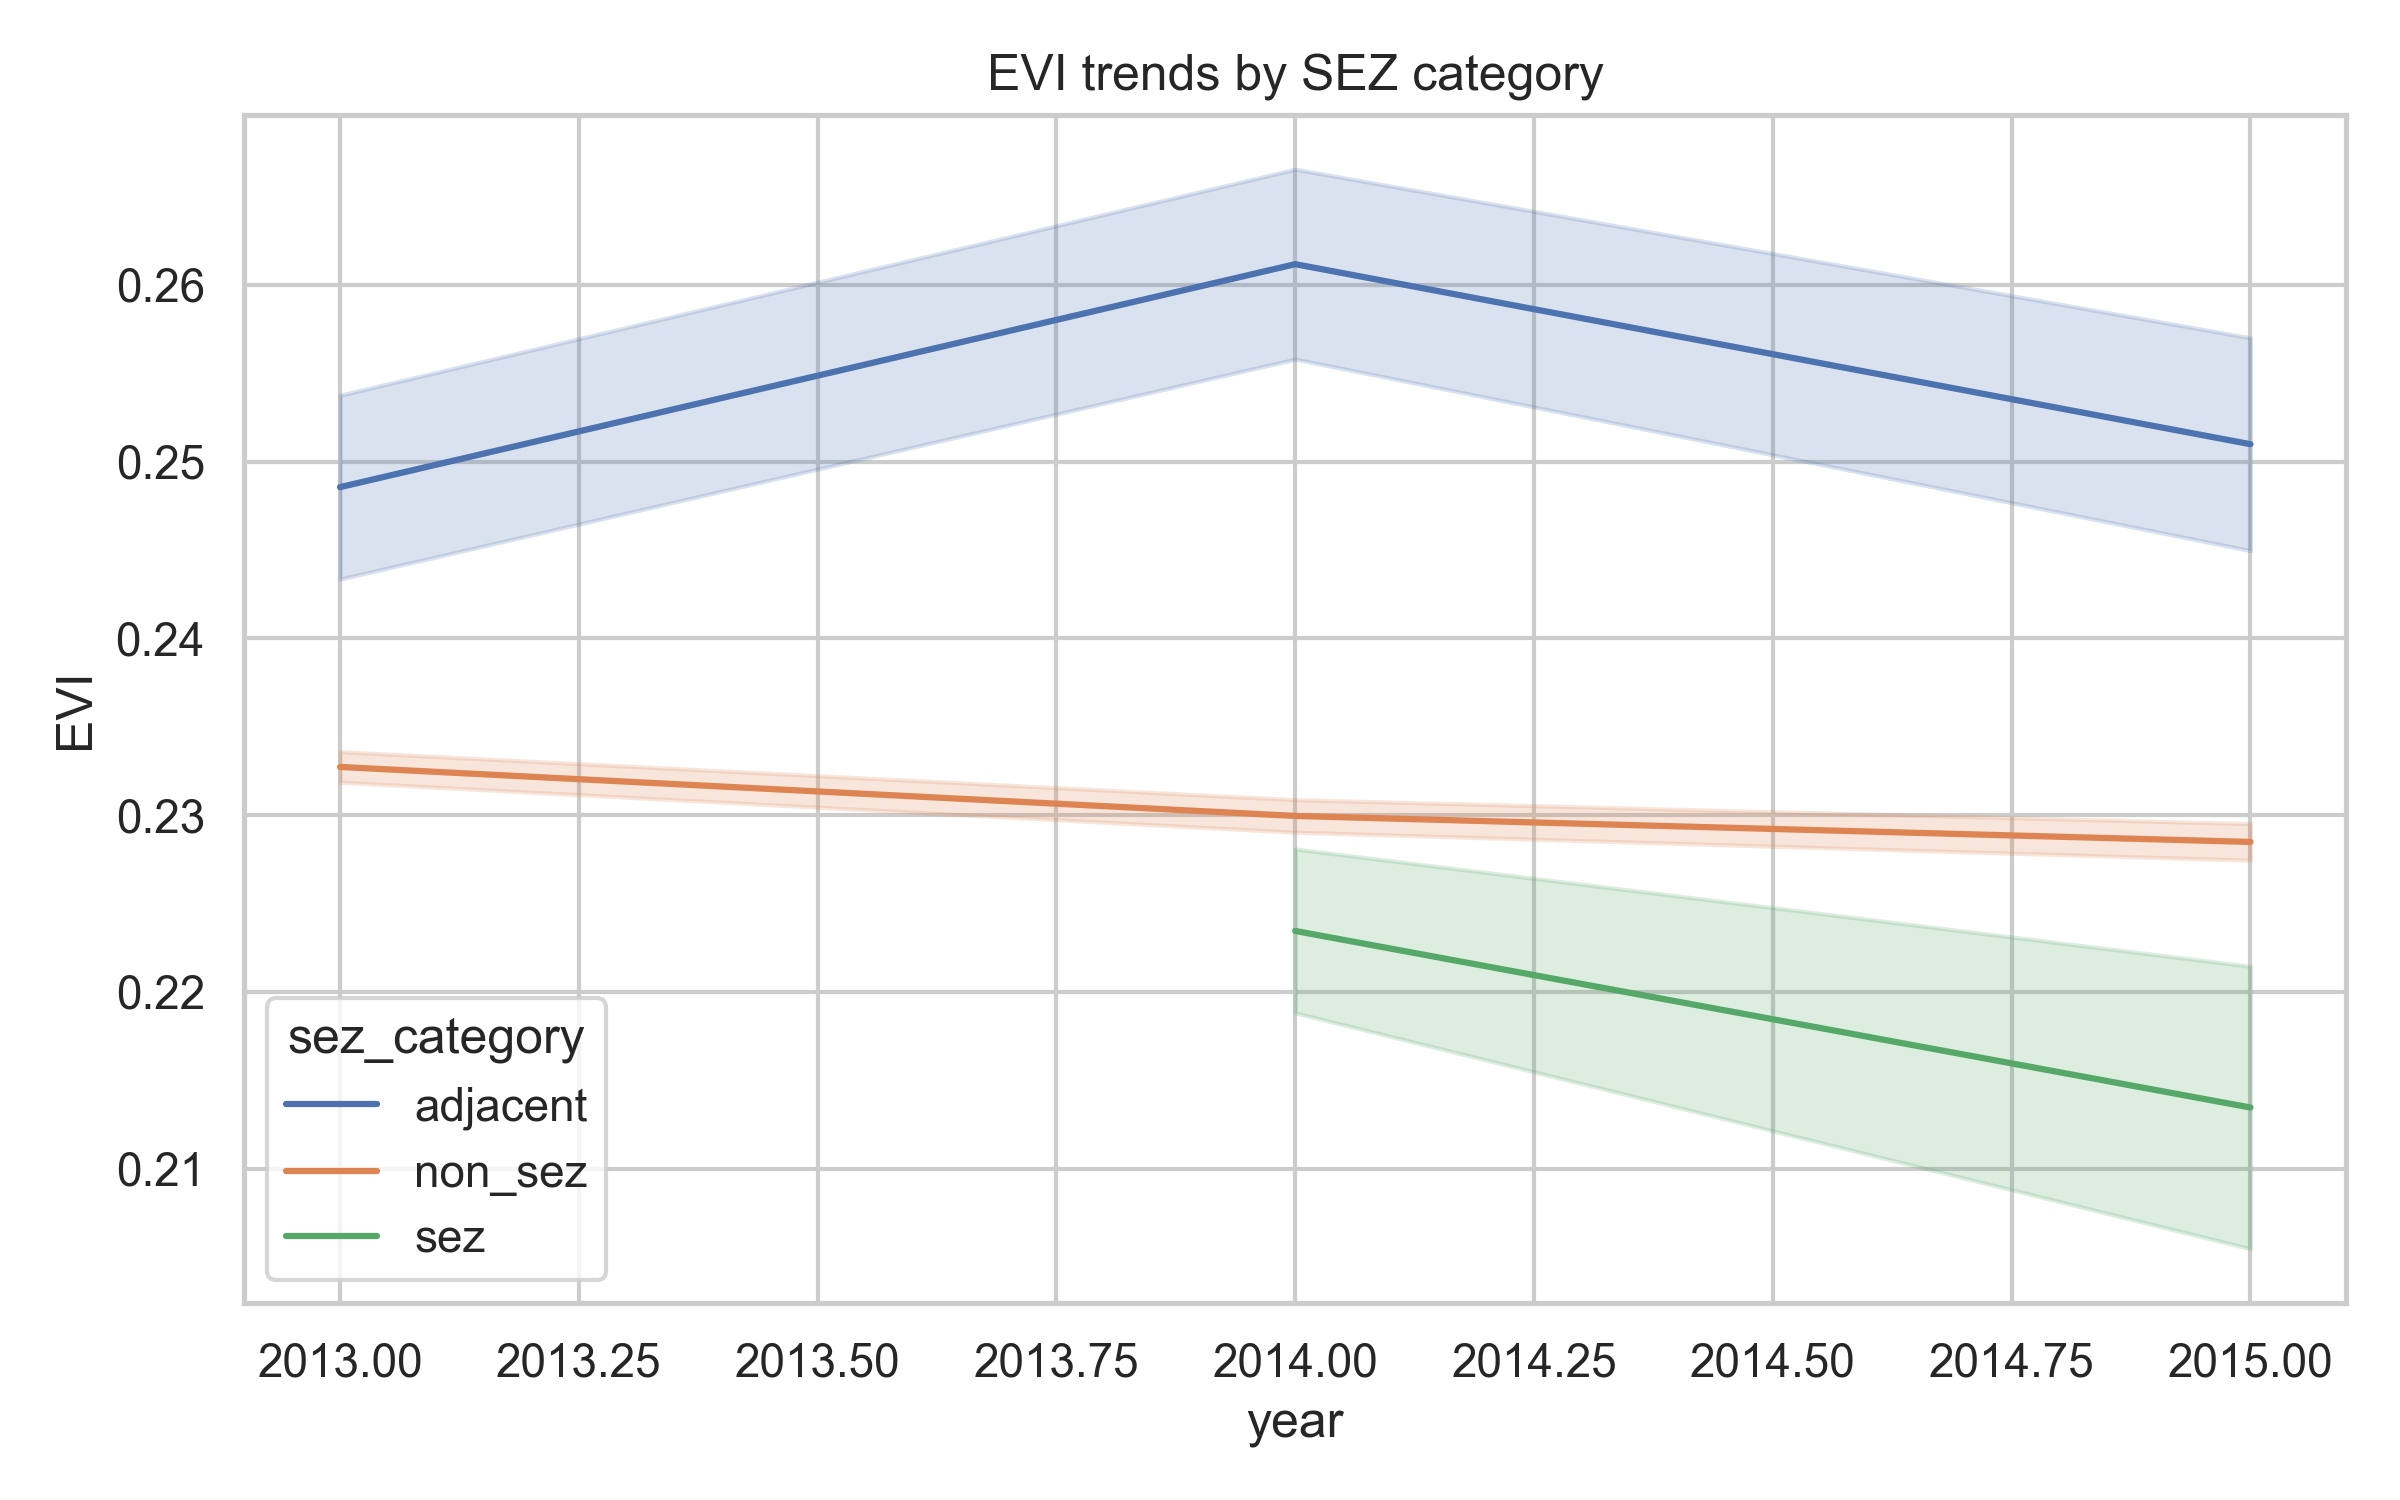

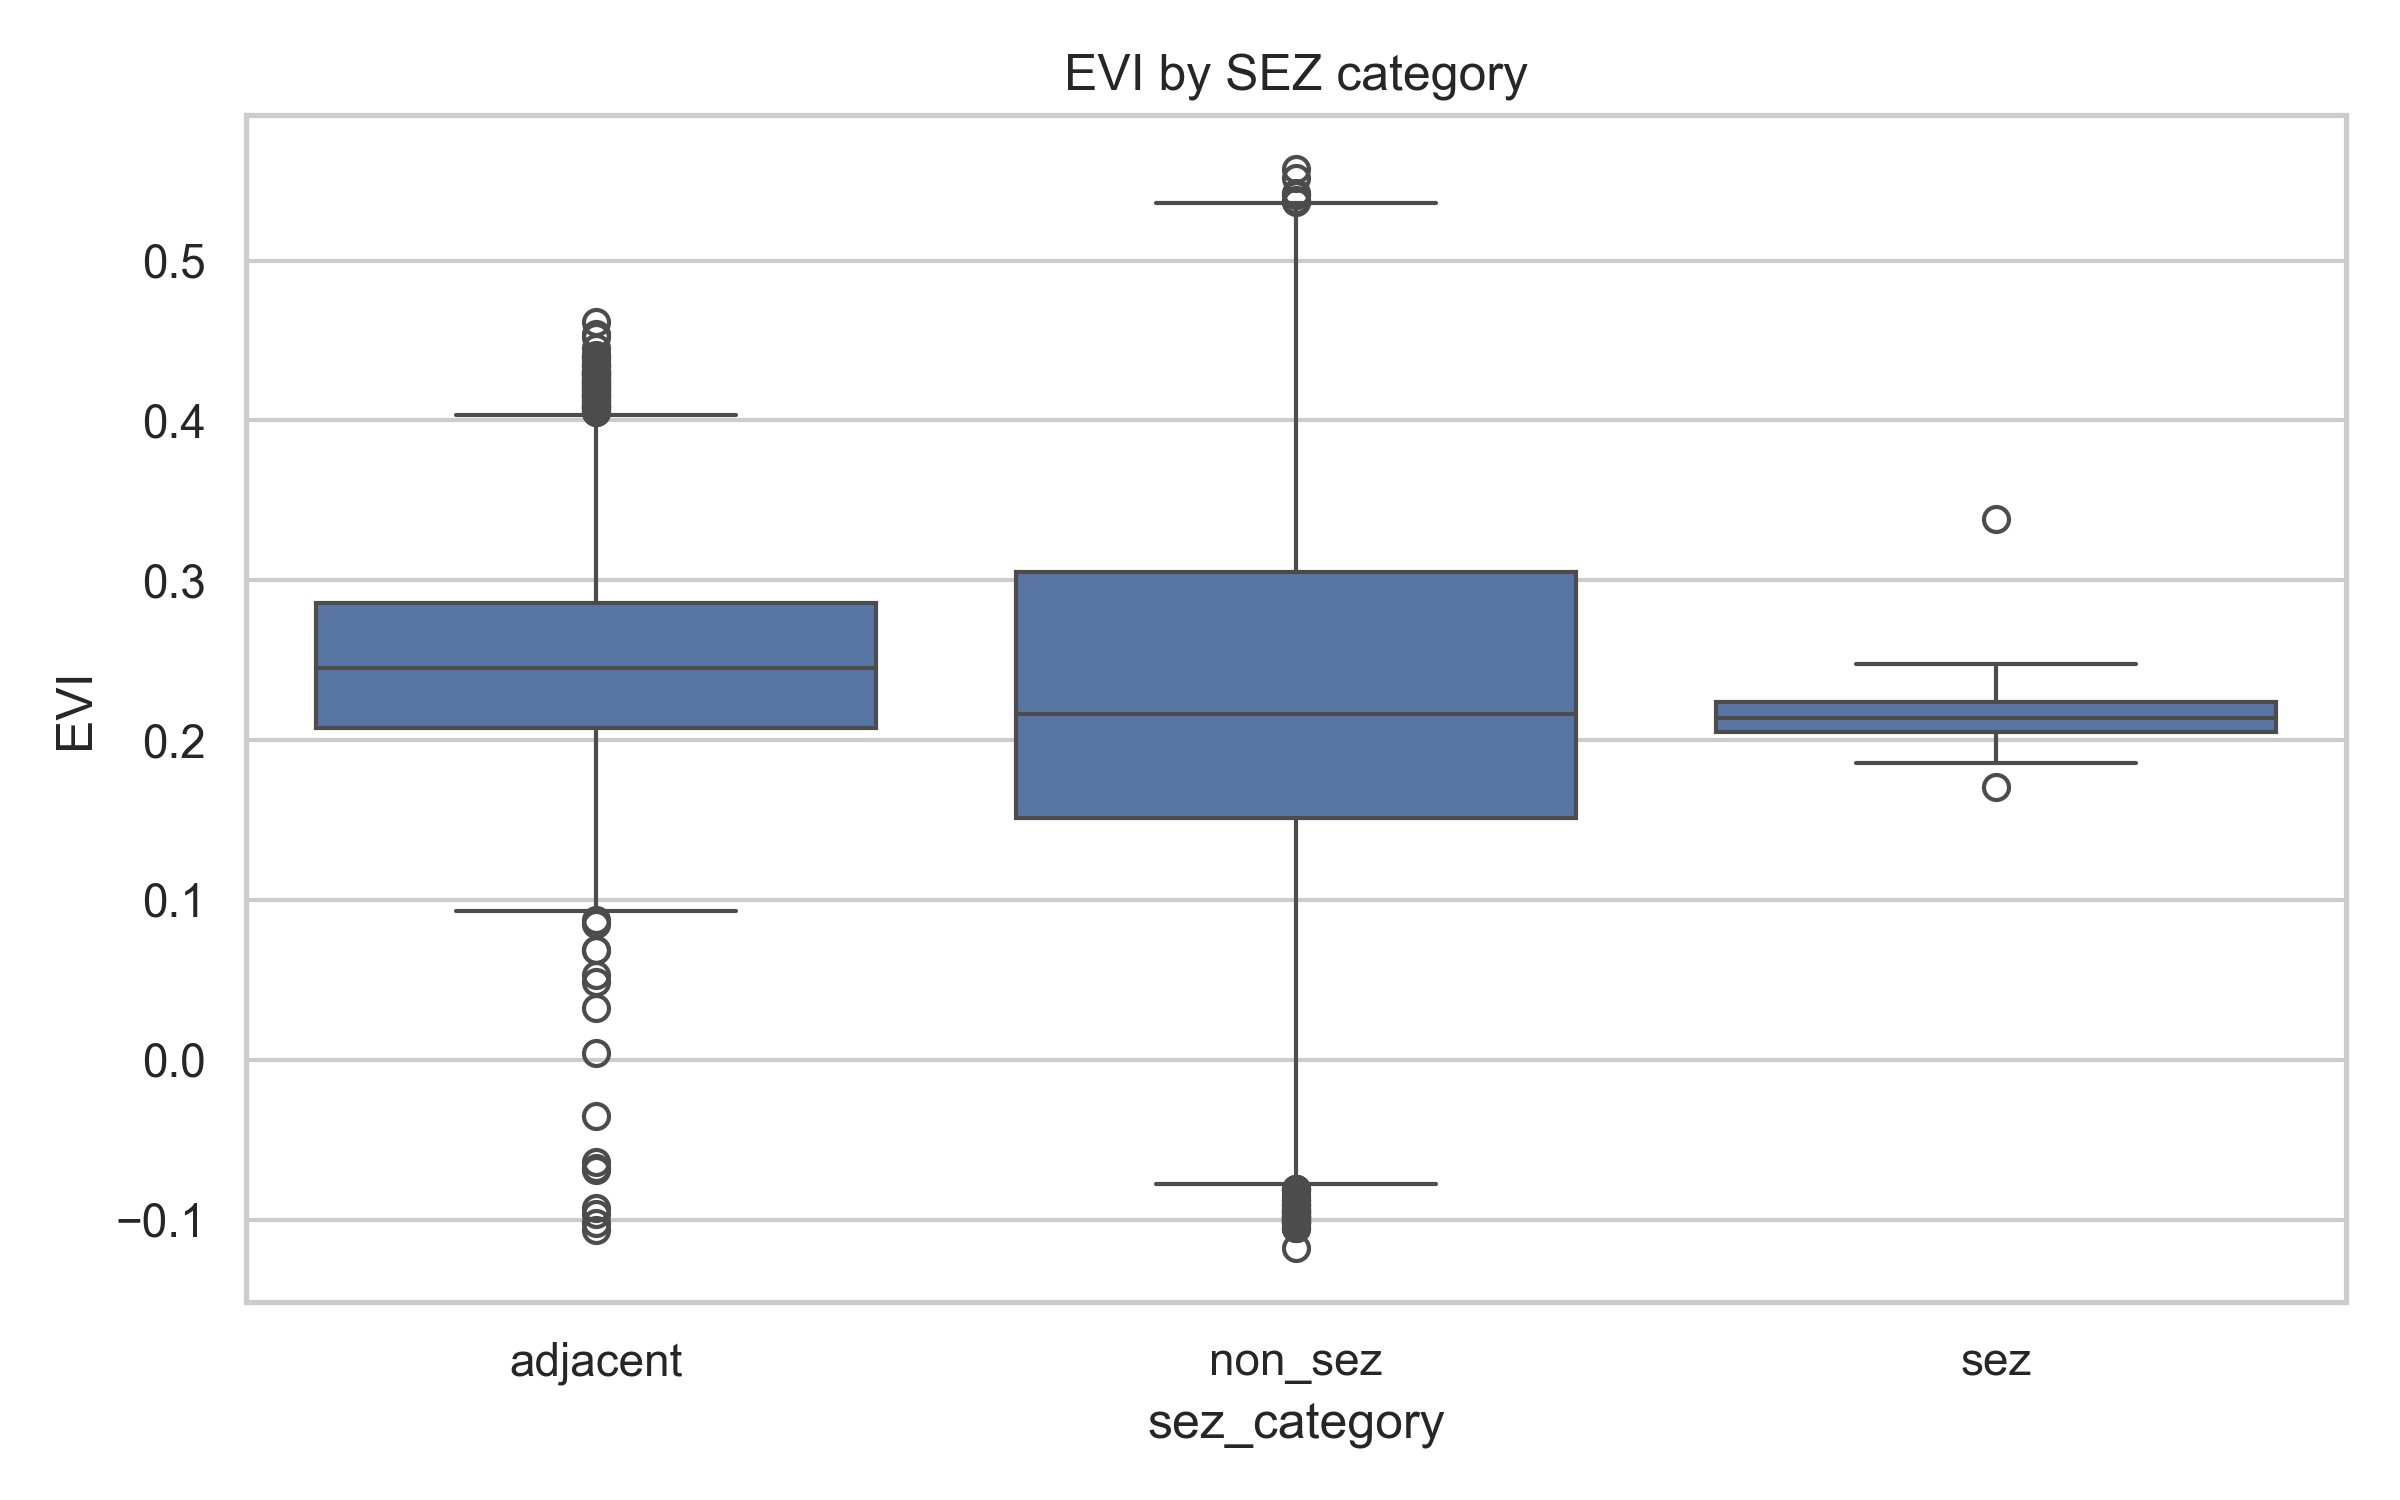

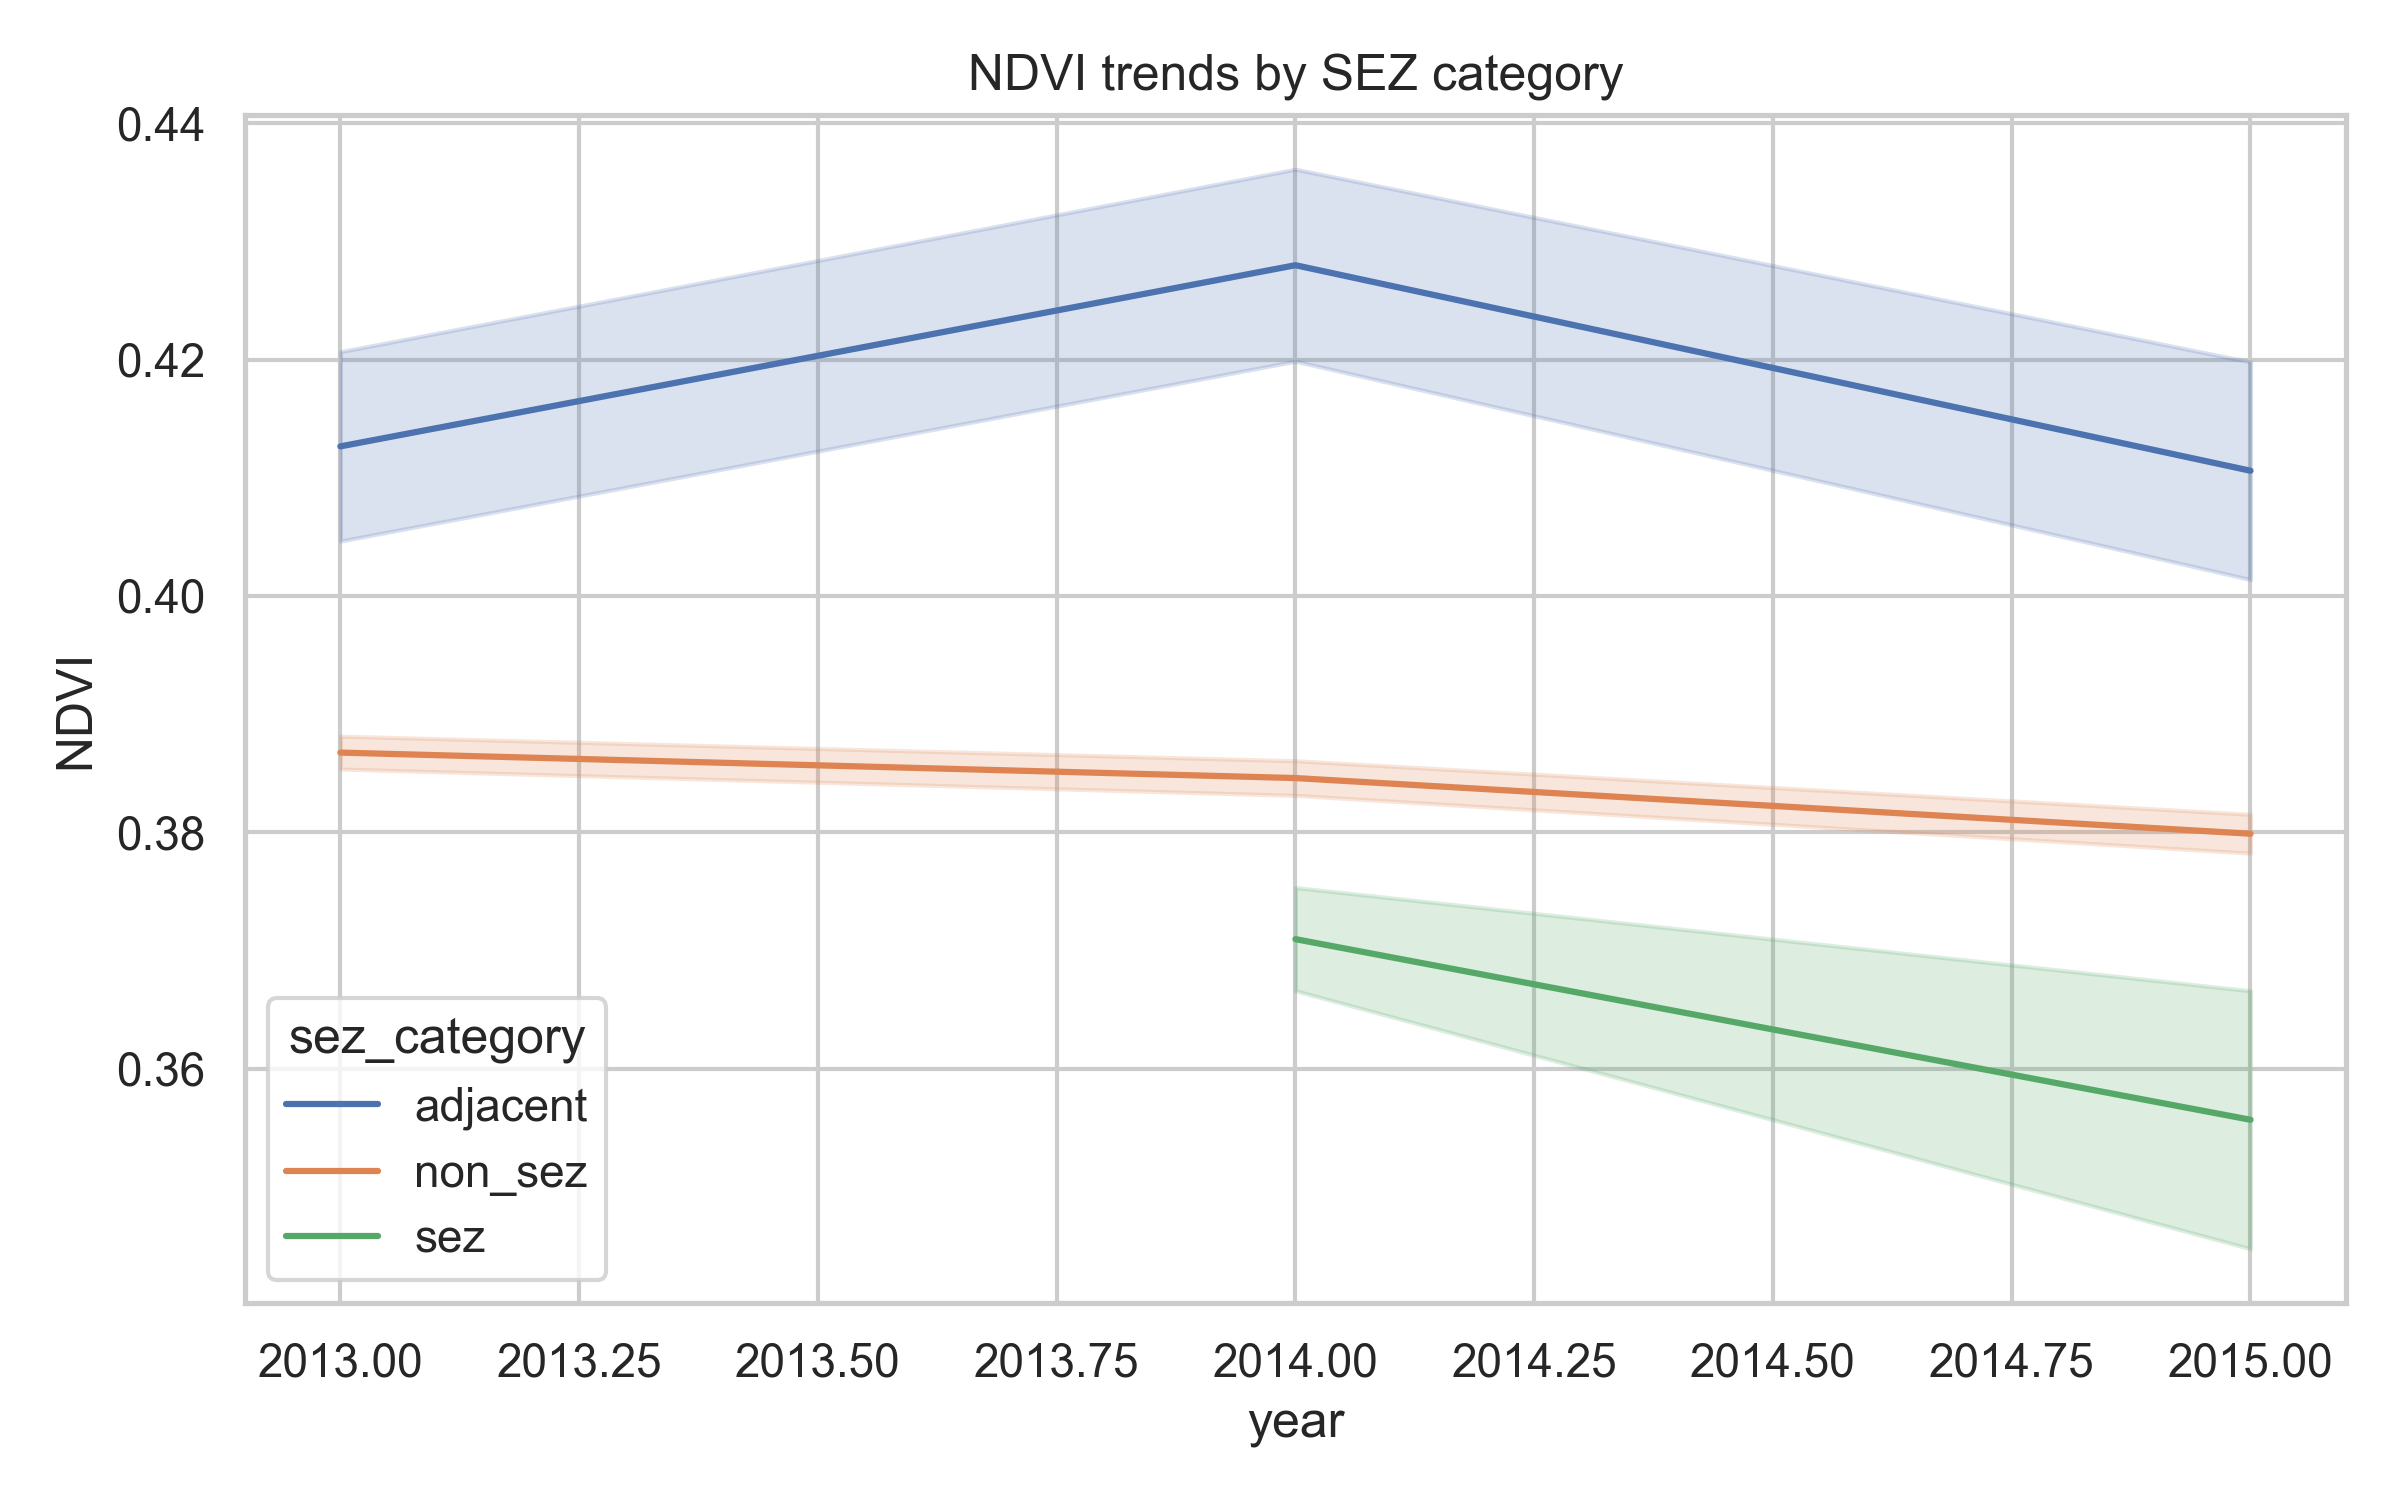

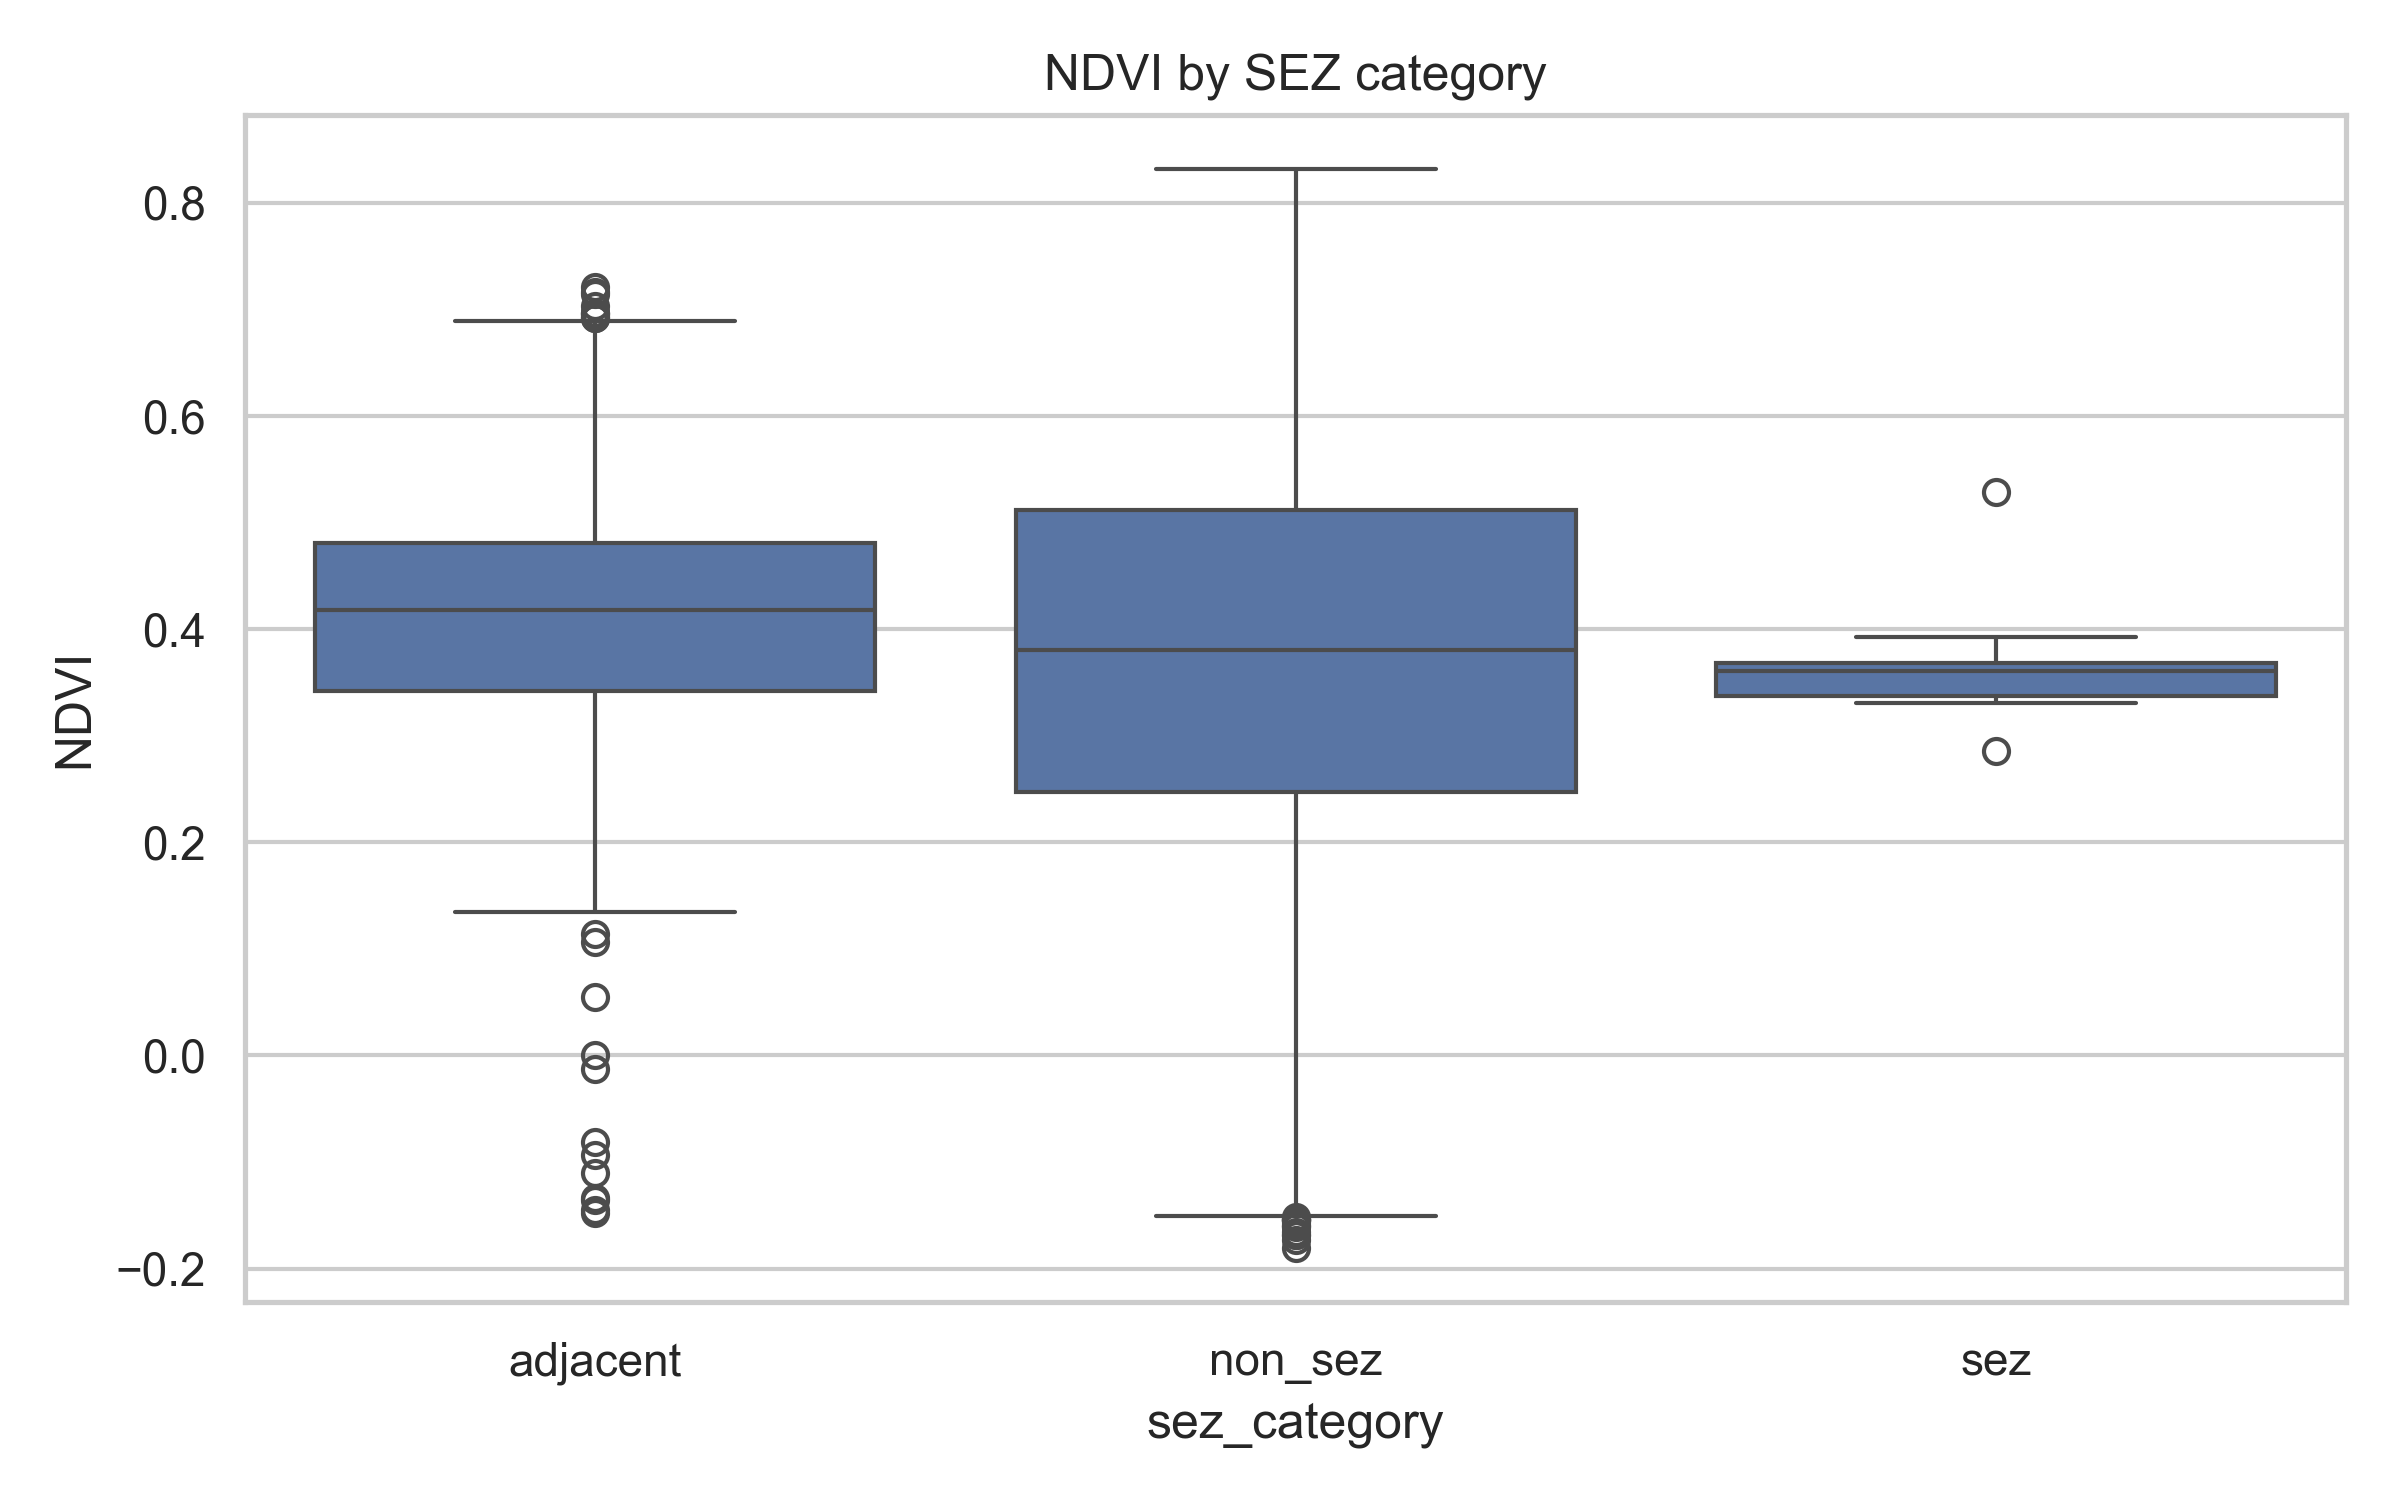

c:\Users\amahai00\AIRS\eep\src\visualization.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.centroid


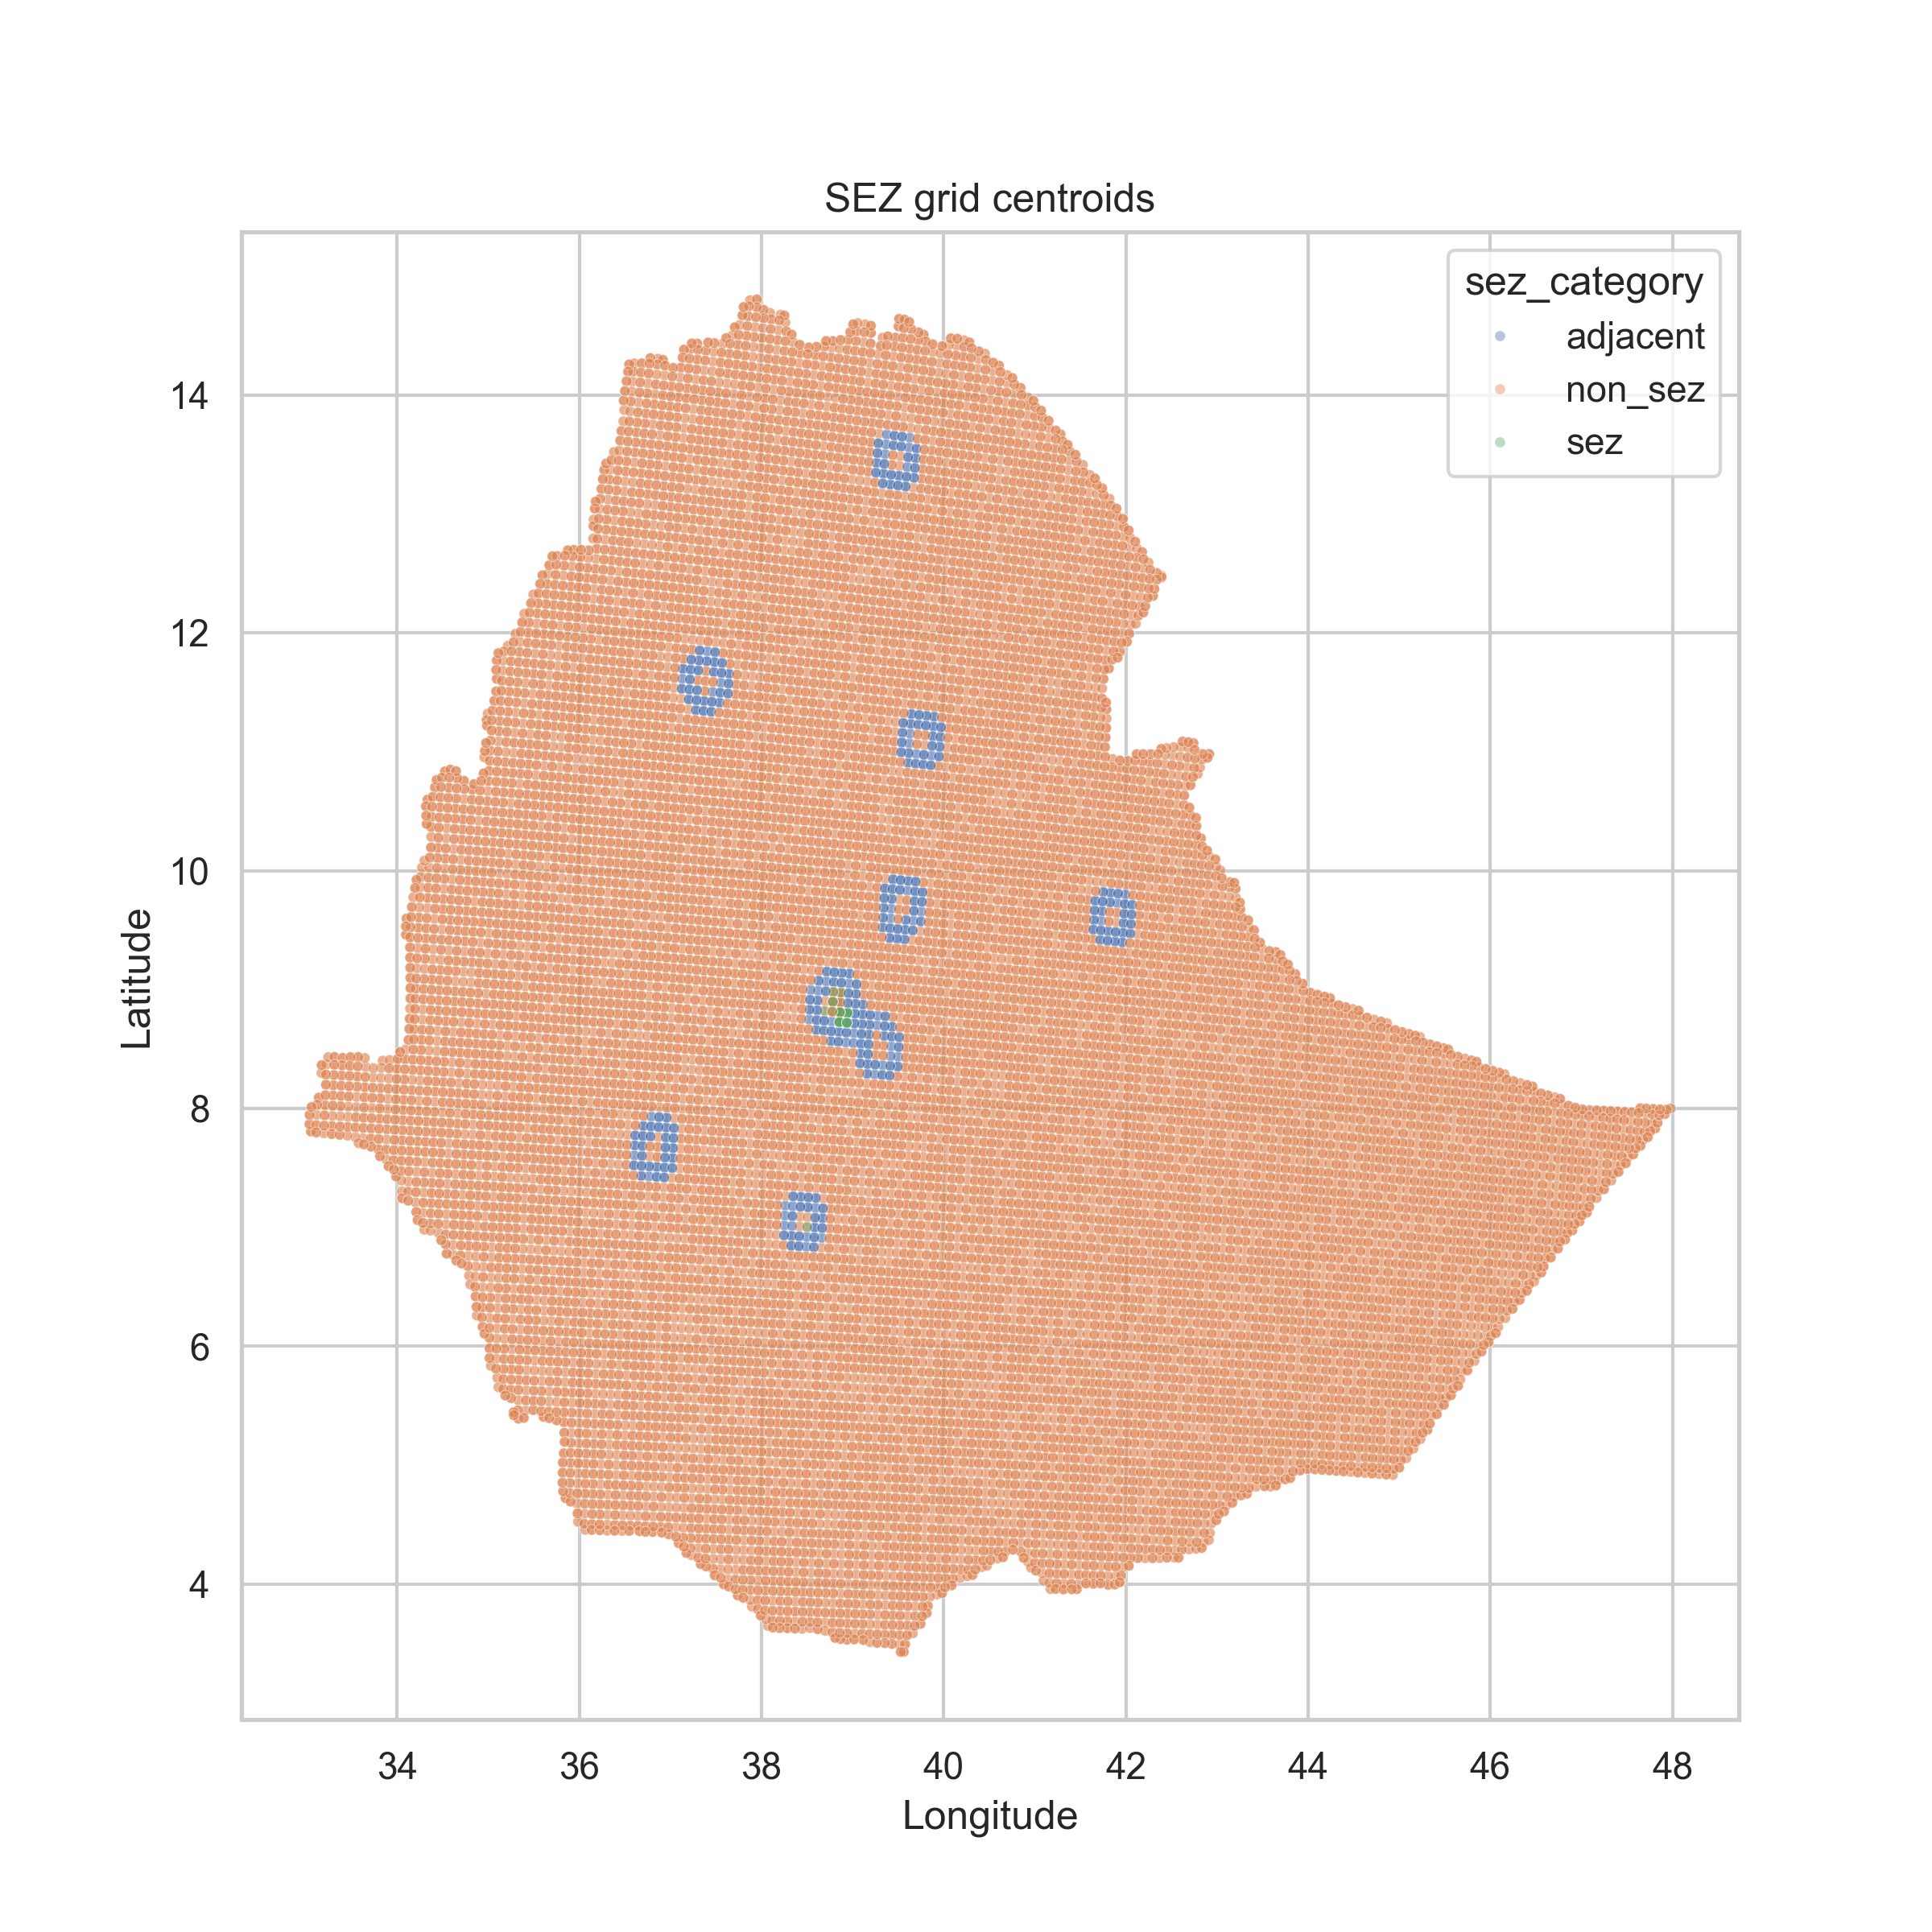

In [5]:
from IPython.display import Image
from src.visualization import plot_time_trends, plot_distribution, plot_centroid_map

for target in ['EVI', 'NDVI']:
    trend_path = plot_time_trends(gdf, target)
    display(Image(filename=str(trend_path)))
    dist_path = plot_distribution(gdf, target)
    display(Image(filename=str(dist_path)))

centroid_path = plot_centroid_map(gdf)
display(Image(filename=str(centroid_path)))
